In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import torchvision.models as models

from sklearn.metrics import hamming_loss, f1_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler



In [87]:
# Check pyTorch version
torch.__version__

'2.2.2'

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

Using: cpu


In [89]:
datapath= "/Users/niraj/Desktop/ML-Cognitive-Science/test/Final_data.csv"
# Defining save path for figures that will be generated later
save_path = r'/Users/niraj/Desktop/ML-Cognitive-Science/Figures/'

In [90]:
# Reading the csv data
df = pd.read_csv(datapath)

In [91]:
# setting to max so that every rows and columns can be seen.
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [92]:
df.head()

,Target,participant,Exp,Condition,item,Sentence,WordNum,Age,TargetPos,Verb,VerbPos,CQ_Type,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,Average_Reading_time,Reading_time_on_target,Response_Recorded.corr,Response_Recorded.rt,Target_Mem,Item_t,Item_p,Item_u,Item_s,Item_c,expName,Item_t_Memory_trials.thisN,Item_t_Memory_trials.thisIndex,Item_t_MemoryTestResp.corr,Item_t_MemoryTestResp.rt,t_Target_Mem_CorResp,t_Target_Mem_CorrectResp,Item_t_Cosine,Item_p_Memory_trials.thisN,Item_p_Memory_trials.thisIndex,Item_p_MemoryTestResp.corr,Item_p_MemoryTestResp.rt,p_Target_Mem_CorResp,p_Target_Mem_CorrectResp,Item_p_Cosine,Item_u_Memory_trials.thisN,Item_u_Memory_trials.thisIndex,Item_u_MemoryTestResp.corr,Item_u_MemoryTestResp.rt,u_Target_Mem_CorResp,u_Target_Mem_CorrectResp,Item_u_Cosine,Item_s_Memory_trials.thisN,Item_s_Memory_trials.thisIndex,Item_s_MemoryTestResp.corr,Item_s_MemoryTestResp.rt,s_Target_Mem_CorResp,s_Target_Mem_CorrectResp,Item_s_Cosine,Item_c_Memory_trials.thisN,Item_c_Memory_trials.thisIndex,Item_c_MemoryTestResp.corr,Item_c_MemoryTestResp.rt,c_Target_Mem_CorResp,c_Target_Mem_CorrectResp,Item_c_Cosine
0,butterfly,A1_E12_Y34,PrePost_Mod,Pre-modified,R15_Aim1_i37,"It was the pretty, shimmering blue butterfly t...",15,Young,7,photographed,11,NaN,2.043582,0.399983,0.566369,0.433314,0.467180,0.516204,0.399971,0.366804,0.533295,0.399932,0.334056,0.283900,0.315596,0.299949,0.250021,NaN,NaN,NaN,NaN,NaN,0.507344,0.399971,0,NaN,NaN,butterfly,clutter,barricade,hummingbird,passenger,Aim1_Final_ToRun_List2,258,36,1,0.782505,lctrl,lctrl,1,34,216,1,3.8052843,rctrl,rctrl,0.088,48,276,1,0.9082908,rctrl,rctrl,0.032,155,156,1,0.867199,rctrl,rctrl,0.487,158,96,1,0.7843946,lctrl,lctrl,NaN
1,mermaid,A1_E12_Y34,PrePost_Mod,Unmodified_Post,R15_Aim1_i16,The folk tale said that it was the mermaid tha...,19,Young,9,trapped,13,Dependency,8.630846,0.516957,0.349751,0.366940,0.283343,0.333261,0.316737,0.299669,0.300390,0.266290,0.300038,0.266773,0.233593,0.232916,0.350182,0.266723,0.283599,0.266592,0.266473,NaN,0.743741,0.300390,1,2.282060,NaN,mermaid,raid,book,fairy,sailor,Aim1_Final_ToRun_List2,26,15,1,0.875974,lctrl,lctrl,1,76,195,0,0.9907946,rctrl,rctrl,0.028,270,255,1,1.6861268,rctrl,rctrl,0.018,286,135,0,2.142522,rctrl,rctrl,0.545,93,75,1,0.8869807,lctrl,lctrl,NaN
2,runner,A1_E12_Y34,PrePost_Mod,Unmodified_Pre,R15_Aim1_i46,I heard that it was the runner that the mentor...,16,Young,7,trained,11,NaN,1.681664,0.400842,0.366426,0.266026,0.283635,0.283253,0.316628,0.300221,0.283160,0.316621,0.333436,0.466473,0.366837,0.283342,0.316617,0.233333,NaN,NaN,NaN,NaN,0.406157,0.316628,0,NaN,NaN,runner,wrens,tower,winner,mentor,Aim1_Final_ToRun_List2,195,45,1,1.088317,lctrl,lctrl,1,49,225,1,0.7259367,rctrl,rctrl,0.032,0,285,1,2.0624101,rctrl,rctrl,0.097,299,165,1,0.754723,rctrl,rctrl,0.593,111,105,1,1.4610028,lctrl,lctrl,NaN
3,sword,A1_E12_Y34,PrePost_Mod,Unmodified_Pre,R15_Aim1_i38,I couldn't believe that it was a sword that th...,16,Young,8,swallowed,12,General,0.313546,0.350083,0.449946,0.450850,0.382726,0.582942,0.300276,0.283303,0.300086,0.366320,0.283605,0.300210,0.283182,0.299796,0.283672,0.399858,NaN,NaN,NaN,NaN,0.351900,0.283303,1,2.732796,NaN,sword,seed,manifold,knife,magician,Aim1_Final_ToRun_List2,66,37,1,0.852112,lctrl,lctrl,1,271,217,0,1.4093314,rctrl,rctrl,0.066,232,277,1,1.0292172,rctrl,rctrl,0.038,54,157,0,1.957806,rctrl,rctrl,0.558,275,97,0,1.060021,lctrl,lctrl,NaN
4,fly,A1_E12_Y34,PrePost_Mod,Unmodified_Post,R15_Aim1_i24,She could not guess that it was the fly that t...,17,Young,9,caught,13,General,0.515149,0.300143,0.299787,0.333482,0.400247,0.482825,0.400239,0.299997,0.266708,0.383099,0.316643,0.283746,0.349857,0.333528,0.349656,0.266792,0.283290,NaN,NaN,NaN,0.345011,0.266708,1,4.563811,NaN,fly,floor,cracker,insect,spider,Aim1_Final_ToRun_List2,160,23,1,1.218718,lctrl,lctrl,1,25,203,0,1.3306159,rctrl,rctrl,0.005,30,263,1,1.1314191,rctrl,rctrl,0.000,277,143,1,3.170142,rctrl,rctrl,0.563,181,

In [93]:
# Creating new dataframe which includes only the required columns for now.
# Required columns are the one inside the list down below.
df = df[["Age","Average_Reading_time","Reading_time_on_target","Item_t_MemoryTestResp.rt","Item_t_MemoryTestResp.corr","Item_s_MemoryTestResp.rt","Item_s_MemoryTestResp.corr"]]

In [94]:
df.head()

,Age,Average_Reading_time,Reading_time_on_target,Item_t_MemoryTestResp.rt,Item_t_MemoryTestResp.corr,Item_s_MemoryTestResp.rt,Item_s_MemoryTestResp.corr
0,Young,0.507344,0.399971,0.782505,1,0.867199,1
1,Young,0.743741,0.300390,0.875974,1,2.142522,0
2,Young,0.406157,0.316628,1.088317,1,0.754723,1
3,Young,0.351900,0.283303,0.852112,1,1.957806,0
4,Young,0.345011,0.266708,1.218718,1,3.170142,1


In [95]:
# mapping so that every features is changed into numerical dataset so that our model could easily understand.
df['Age'] = df['Age'].map({'Young': 0, 'Old': 1})

In [96]:
df.head()

,Age,Average_Reading_time,Reading_time_on_target,Item_t_MemoryTestResp.rt,Item_t_MemoryTestResp.corr,Item_s_MemoryTestResp.rt,Item_s_MemoryTestResp.corr
0,0,0.507344,0.399971,0.782505,1,0.867199,1
1,0,0.743741,0.300390,0.875974,1,2.142522,0
2,0,0.406157,0.316628,1.088317,1,0.754723,1
3,0,0.351900,0.283303,0.852112,1,1.957806,0
4,0,0.345011,0.266708,1.218718,1,3.170142,1


In [97]:
# checking if there is any null values in our dataset.
df.isnull().head()

,Age,Average_Reading_time,Reading_time_on_target,Item_t_MemoryTestResp.rt,Item_t_MemoryTestResp.corr,Item_s_MemoryTestResp.rt,Item_s_MemoryTestResp.corr
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [98]:
# Splitting features for X 
X = df.drop(["Item_t_MemoryTestResp.corr","Item_s_MemoryTestResp.corr"],axis = "columns")
X.head()

,Age,Average_Reading_time,Reading_time_on_target,Item_t_MemoryTestResp.rt,Item_s_MemoryTestResp.rt
0,0,0.507344,0.399971,0.782505,0.867199
1,0,0.743741,0.300390,0.875974,2.142522
2,0,0.406157,0.316628,1.088317,0.754723
3,0,0.351900,0.283303,0.852112,1.957806
4,0,0.345011,0.266708,1.218718,3.170142


In [99]:
# # Todo
# # remove anything that is higher than standard deviation of 2.5 for each column
# # mean+-(standard_deviation* 2.5)

# # if this doesn't work try this:
# # Median split the participants on their accuracy to comprehension questions (not memory questions)


# 1) just take General and Dependency from the CQ_type
# 2) select one person 
# 3) go to Response_recorded.corr and take average of one person.
# 4) make a new column "Accuray" and fill the all rows of the same person with the same accuracy score
# 4) there's gonna be many rows of the same person. Take Average of that person.
# 5) continue this same method for every person
# 6) take median of all person.
# 7) make new column "Higher_than_median" and "Lower than median"
# 8) give values 1 to those who is higher than median and 0 to those who is lower than median



In [100]:
X["Item_s_MemoryTestResp.rt"].median()

1.06573795

In [101]:
df.head()

,Age,Average_Reading_time,Reading_time_on_target,Item_t_MemoryTestResp.rt,Item_t_MemoryTestResp.corr,Item_s_MemoryTestResp.rt,Item_s_MemoryTestResp.corr
0,0,0.507344,0.399971,0.782505,1,0.867199,1
1,0,0.743741,0.300390,0.875974,1,2.142522,0
2,0,0.406157,0.316628,1.088317,1,0.754723,1
3,0,0.351900,0.283303,0.852112,1,1.957806,0
4,0,0.345011,0.266708,1.218718,1,3.170142,1


In [102]:
# Splitting features for Y
# y1 = df["Item_t_MemoryTestResp.corr"]
# y2 = df["Item_s_MemoryTestResp.corr"]
# print("This is the shape of y1 and y2: ",y1.shape,y2.shape)
# y= np.column_stack((y1,y2))
y = df[["Item_t_MemoryTestResp.corr","Item_s_MemoryTestResp.corr"]]


print("This is y shape: ",y.shape)
print("This is X shape: ",X.shape)


This is y shape:  (7260, 2)
This is X shape:  (7260, 5)


In [103]:
# # Splitting the datasets into train and test using 20% as test size

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape



In [104]:
# Using StandardScaler so that our data doesn't go beyond the range.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

print("Shape of X_tensor and y_tensor: ",X_tensor.shape,y_tensor.shape)
                            
# Creating dataloader for training and testing purpose                           
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)

# Create an instance of the dataset
dataset = MyDataset(X_tensor, y_tensor)

# Define the split sizes. Let's assume 70% for training, 15% for validation, and 15% for testing
train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15

# Get the lengths of splits
total_size = len(dataset)
train_size = int(total_size * train_ratio)
valid_size = int(total_size * valid_ratio)
test_size = int(total_size * test_ratio)

# Split the dataset
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

# creating train, test and dev loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Shape of X_tensor and y_tensor:  torch.Size([7260, 5]) torch.Size([7260, 2])


In [105]:
len(train_dataset)


5082

In [106]:
# Making a dataframe to append the scores.
# Create an empty DataFrame with desired columns
table_df = pd.DataFrame(columns=["Model name", "Accuracy", "Precision", "Recall", "F1 Score"])

## Trying with RandomForest to check the accuracy

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape,y_train.shape)
rf_clf= RandomForestClassifier()

multi_target_clf = MultiOutputClassifier(estimator = rf_clf)

param_grid = {'estimator__n_estimators': range(1,100)}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(multi_target_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predicting the test set results
y_pred = grid_search.predict(X_test)

# Calculating the score
score = grid_search.score(X_test,y_test)
print("Score: ", score)

# Printing the Classification report to better analysis
print(classification_report(y_test,y_pred,zero_division=1))


(5808, 5) (5808, 2)
Best parameters:  {'estimator__n_estimators': 87}
Score:  0.46005509641873277
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1021
           1       0.70      0.93      0.80       991

   micro avg       0.71      0.91      0.80      2012
   macro avg       0.72      0.91      0.80      2012
weighted avg       0.72      0.91      0.80      2012
 samples avg       0.72      0.91      0.78      2012



Training set (X_train): (5808, 5)
Test set (X_test): (1452, 5)
Accuracy: 0.465564738292011


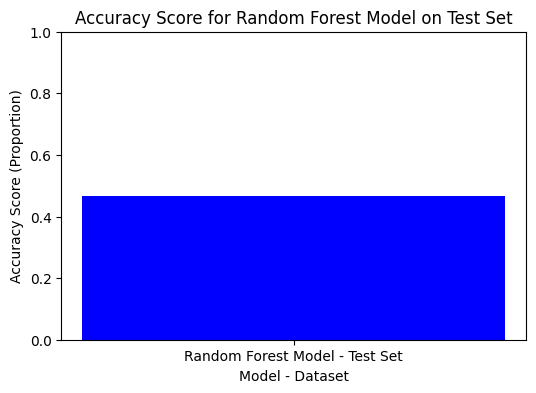

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       984
           1       0.72      0.91      0.80      1036

   micro avg       0.72      0.90      0.80      2020
   macro avg       0.72      0.90      0.80      2020
weighted avg       0.72      0.90      0.80      2020
 samples avg       0.72      0.90      0.78      2020



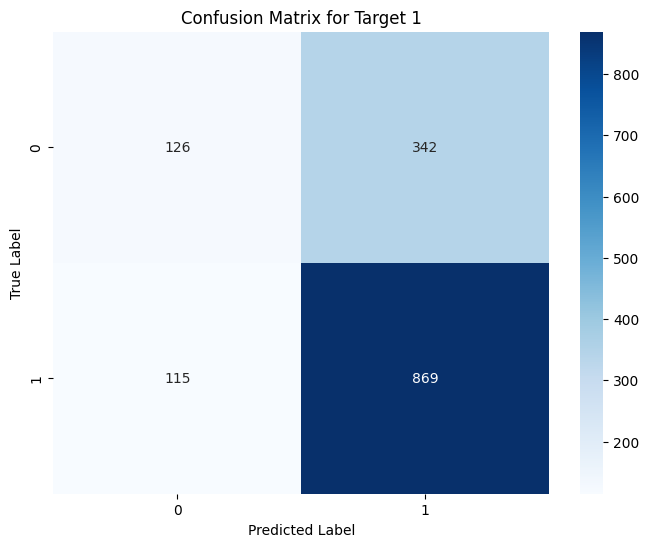

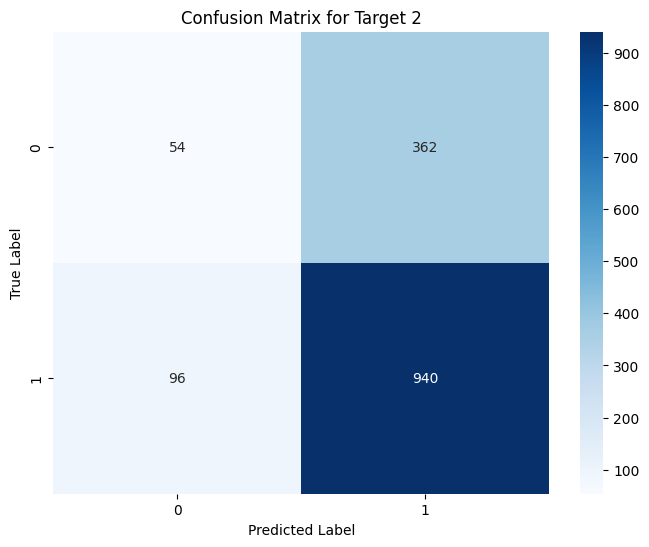

In [61]:


# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=76)

# Split the datasets into train and test using 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Training set (X_train): {X_train.shape}")
print(f"Test set (X_test): {X_test.shape}")

# Initialize the multi-output classifier
multi_target_clf = MultiOutputClassifier(estimator=rf_clf)

# Fit the model with the training data
multi_target_clf.fit(X_train, y_train)

# Predict the test data
y_test_pred = multi_target_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Plot the accuracy
plt.figure(figsize=(6, 4))
plt.bar('Random Forest Model - Test Set', accuracy, color='blue')
plt.xlabel('Model - Dataset')
plt.ylabel('Accuracy Score (Proportion)')
plt.title('Accuracy Score for Random Forest Model on Test Set')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(save_path + 'Accuracy_RF')
plt.show()

# Calculate and print the classification report
class_report = classification_report(y_test, y_test_pred, zero_division=1)
print("Classification Report:")
print(class_report)

# Calculate the confusion matrices for the two targets
conf_matrix_target1 = confusion_matrix(y_test.iloc[:, 0], y_test_pred[:, 0])
conf_matrix_target2 = confusion_matrix(y_test.iloc[:, 1], y_test_pred[:, 1])

# Plot the confusion matrix for the first target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Target 1')
plt.savefig(save_path + 'RF_CM_Target1')
plt.show()

# Plot the confusion matrix for the second target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Target 2')
plt.savefig(save_path + 'RF_CM_Target2')
plt.show()

Training set (X_train): (5808, 5)
Test set (X_test): (1452, 5)
Hamming Loss: 0.3171
F1-score: 0.7966
Precision: 0.7192
Recall: 0.8926
Accuracy: 0.4683


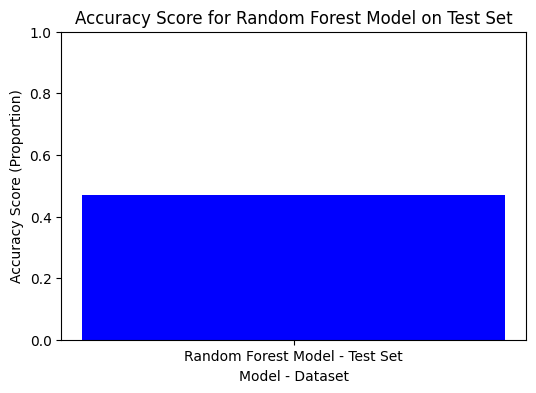

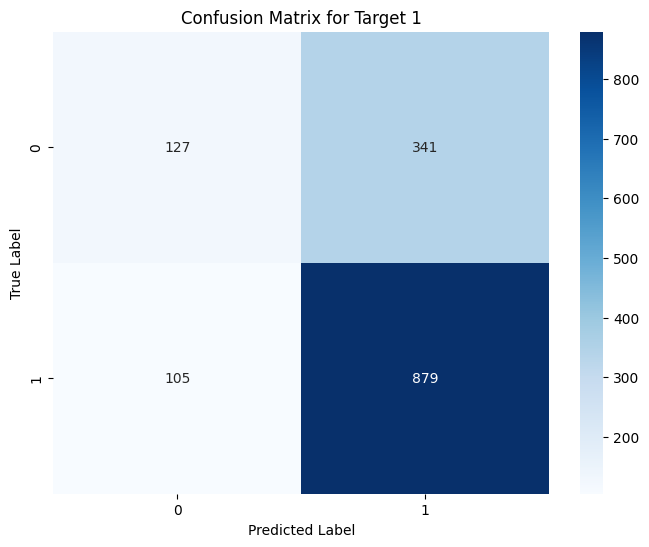

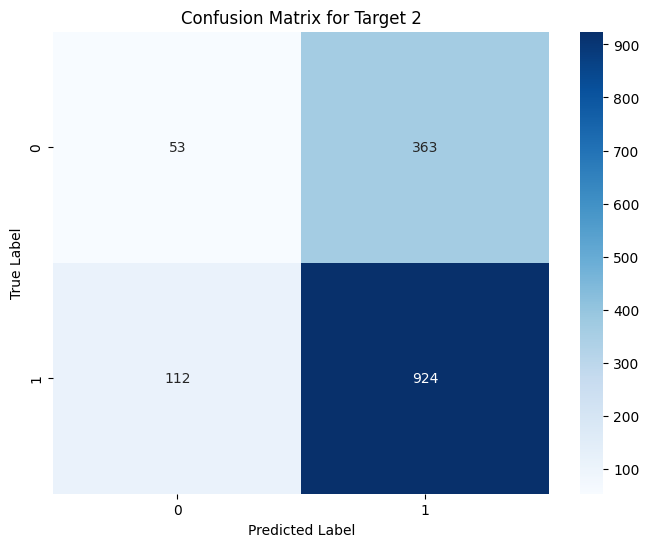

In [111]:

# Define save path for figures
save_path = '/Users/niraj/Desktop/ML-Cognitive-Science/Figures/'

# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=76)

# Split the datasets into train and test using 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Training set (X_train): {X_train.shape}")
print(f"Test set (X_test): {X_test.shape}")

# Initialize the multi-output classifier
multi_target_clf = MultiOutputClassifier(estimator=rf_clf)

# Fit the model with the training data
multi_target_clf.fit(X_train, y_train)

# Predict the test data
y_test_pred = multi_target_clf.predict(X_test)

# Convert predictions and targets to tensors for metric calculations
y_test_pred_tensor = torch.tensor(y_test_pred)
y_test_tensor = torch.tensor(y_test.values)

# Calculate metrics
hamming_loss_val = hamming_loss(y_test_tensor, y_test_pred_tensor)
f1 = f1_score(y_test_tensor, y_test_pred_tensor, average='micro')
precision = precision_score(y_test_tensor, y_test_pred_tensor, average='micro')
recall = recall_score(y_test_tensor, y_test_pred_tensor, average='micro')
accuracy = accuracy_score(y_test_tensor, y_test_pred_tensor)

# Print metrics
print(f"Hamming Loss: {hamming_loss_val:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plot the accuracy
plt.figure(figsize=(6, 4))
plt.bar('Random Forest Model - Test Set', accuracy, color='blue')
plt.xlabel('Model - Dataset')
plt.ylabel('Accuracy Score (Proportion)')
plt.title('Accuracy Score for Random Forest Model on Test Set')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(save_path + 'Accuracy_RF.png')
plt.show()

# Calculate the confusion matrices for the two targets
conf_matrix_target1 = confusion_matrix(y_test.iloc[:, 0], y_test_pred[:, 0])
conf_matrix_target2 = confusion_matrix(y_test.iloc[:, 1], y_test_pred[:, 1])

# Plot the confusion matrix for the first target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Target 1')
plt.savefig(save_path + 'RF_CM_Target1.png')
plt.show()

# Plot the confusion matrix for the second target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Target 2')
plt.savefig(save_path + 'RF_CM_Target2.png')
plt.show()


Accuracy: 0.465564738292011


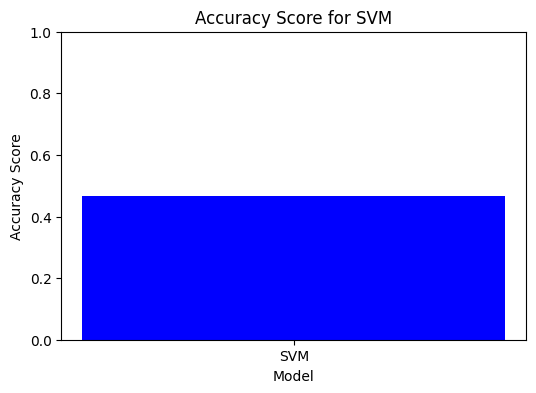

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       984
           1       0.72      0.91      0.80      1036

   micro avg       0.72      0.90      0.80      2020
   macro avg       0.72      0.90      0.80      2020
weighted avg       0.72      0.90      0.80      2020
 samples avg       0.72      0.90      0.78      2020



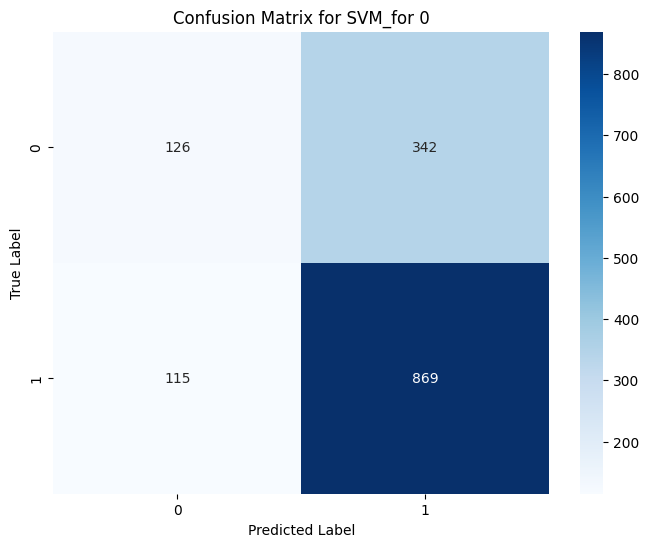

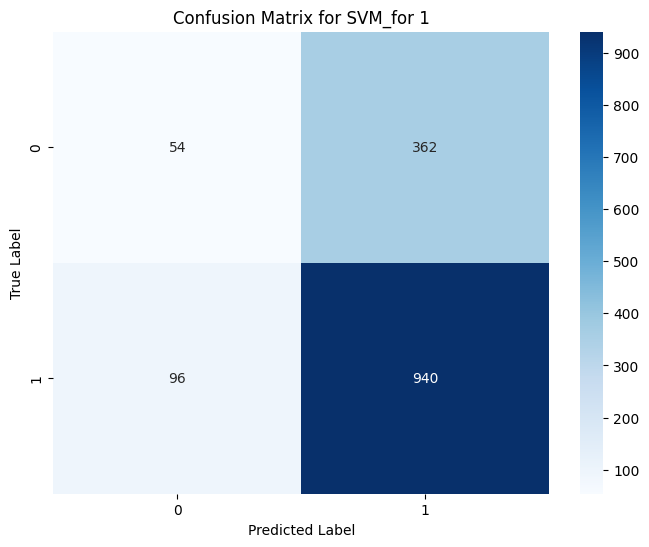

In [63]:
## Try with SVM model to see if it outperforms RandomForest

from sklearn.multioutput import MultiOutputClassifier

# Splitting the datasets into train and test using 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Creating a base SVM classifier
base_svc = SVC(C = 10, kernel = 'rbf', gamma = 'auto')

# Wrap the SVC model with MultiOutputClassifier
multi_svc = MultiOutputClassifier(base_svc)

# Fit the model to the data
multi_svc.fit(X_train, y_train)


y_test_pred = multi_target_clf.predict(X_test)


y_test_true_target1 = y_test.iloc[:, 0]  # Assuming the first column corresponds to the first target variable
y_test_true_target2 = y_test.iloc[:, 1]  # Assuming the second column corresponds to the second target variable

y_test_pred_target1 = y_test_pred[:, 0]
y_test_pred_target2 = y_test_pred[:, 1]

# Analyzing the model:
# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


plt.figure(figsize=(6, 4))
plt.bar('SVM', accuracy, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for SVM')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(save_path + "Accuracy_SVM")
plt.show()



# 2. Precision, Recall, and F1 Score
class_report = classification_report(y_test, y_test_pred,zero_division=1)
print("Classification Report:")
print(class_report)

# 3. Confusion Matrix
conf_matrix_target1 = confusion_matrix(y_test_true_target1, y_test_pred_target1)
conf_matrix_target2 = confusion_matrix(y_test_true_target2, y_test_pred_target2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM_for 0')
plt.savefig(save_path + "Confusion Matrix for SVM_for 0")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM_for 1')
plt.savefig(save_path + "Confusion Matrix for SVM_for 1")

plt.show()

Hamming Loss: 0.3003
F1-score: 0.8207
Precision: 0.7018
Recall: 0.9881
Accuracy: 0.4731


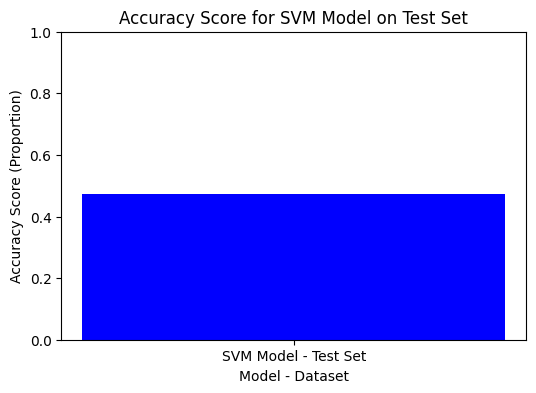

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       984
           1       0.71      0.99      0.83      1036

   micro avg       0.70      0.99      0.82      2020
   macro avg       0.70      0.99      0.82      2020
weighted avg       0.70      0.99      0.82      2020
 samples avg       0.70      0.99      0.77      2020



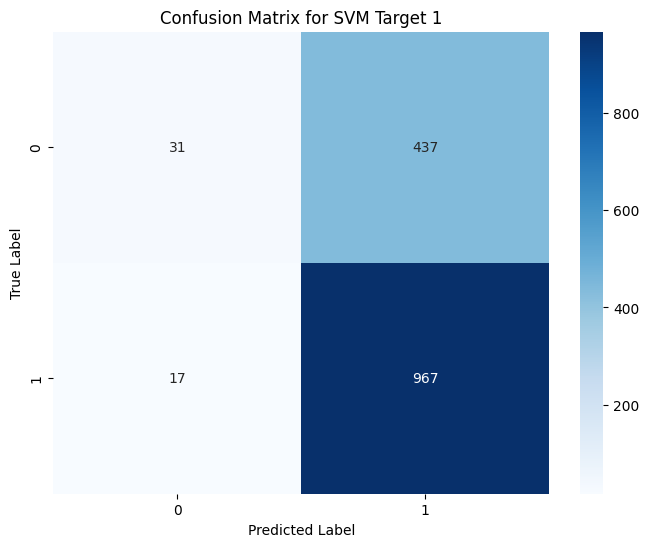

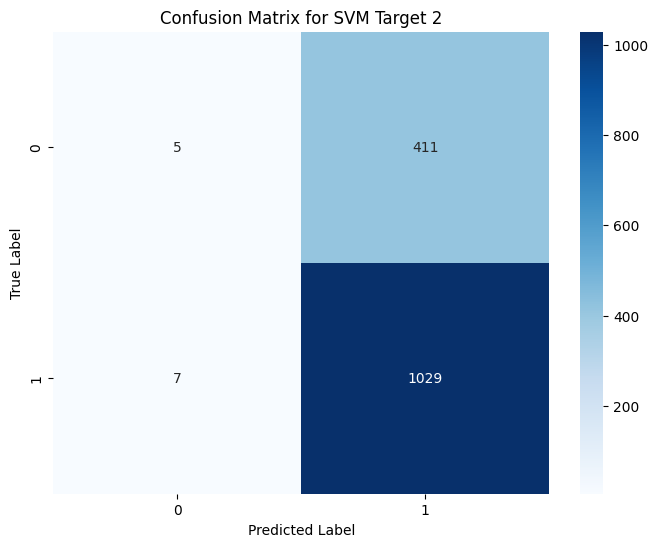

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss, f1_score, precision_score, recall_score
import torch

# Define save path for figures
save_path = '/Users/niraj/Desktop/ML-Cognitive-Science/Figures/'

# Splitting the datasets into train and test using 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a base SVM classifier
base_svc = SVC(C=10, kernel='rbf', gamma='auto', probability=True)

# Wrap the SVC model with MultiOutputClassifier
multi_svc = MultiOutputClassifier(base_svc)

# Fit the model to the data
multi_svc.fit(X_train, y_train)

# Predict the test data
y_test_pred = multi_svc.predict(X_test)

# Convert predictions and targets to tensors for metric calculations
y_test_pred_tensor = torch.tensor(y_test_pred)
y_test_tensor = torch.tensor(y_test.values)

# Calculate metrics
hamming_loss_val = hamming_loss(y_test_tensor, y_test_pred_tensor)
f1 = f1_score(y_test_tensor, y_test_pred_tensor, average='micro')
precision = precision_score(y_test_tensor, y_test_pred_tensor, average='micro')
recall = recall_score(y_test_tensor, y_test_pred_tensor, average='micro')
accuracy = accuracy_score(y_test_tensor, y_test_pred_tensor)

# Print metrics
print(f"Hamming Loss: {hamming_loss_val:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plot the accuracy
plt.figure(figsize=(6, 4))
plt.bar('SVM Model - Test Set', accuracy, color='blue')
plt.xlabel('Model - Dataset')
plt.ylabel('Accuracy Score (Proportion)')
plt.title('Accuracy Score for SVM Model on Test Set')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(save_path + 'Accuracy_SVM.png')
plt.show()

# Calculate and print the classification report
class_report = classification_report(y_test, y_test_pred, zero_division=1)
print("Classification Report:")
print(class_report)

# Calculate the confusion matrices for the two targets
conf_matrix_target1 = confusion_matrix(y_test.iloc[:, 0], y_test_pred[:, 0])
conf_matrix_target2 = confusion_matrix(y_test.iloc[:, 1], y_test_pred[:, 1])

# Plot the confusion matrix for the first target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Target 1')
plt.savefig(save_path + 'SVM_CM_Target1.png')
plt.show()

# Plot the confusion matrix for the second target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Target 2')
plt.savefig(save_path + 'SVM_CM_Target2.png')
plt.show()


In [64]:
y_pred = multi_svc.predict(X_test[:10])
y_pred.shape

(10, 2)

In [65]:
y_pred[:10]

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [66]:
y_test[:10]

,Item_t_MemoryTestResp.corr,Item_s_MemoryTestResp.corr
4323,0,1
3463,0,1
5648,1,1
2280,1,1
3114,1,1
5770,1,1
5420,0,1
6634,1,1
6058,1,0
6473,1,1


## Now, Modifying the data such that removing anything that is higher than (mean - standard deviation * 2.5).

In [67]:
df.head()

,Age,Average_Reading_time,Reading_time_on_target,Item_t_MemoryTestResp.rt,Item_t_MemoryTestResp.corr,Item_s_MemoryTestResp.rt,Item_s_MemoryTestResp.corr
0,0,0.507344,0.399971,0.782505,1,0.867199,1
1,0,0.743741,0.300390,0.875974,1,2.142522,0
2,0,0.406157,0.316628,1.088317,1,0.754723,1
3,0,0.351900,0.283303,0.852112,1,1.957806,0
4,0,0.345011,0.266708,1.218718,1,3.170142,1


In [68]:
mean = df["Average_Reading_time"].mean()
sd = df["Average_Reading_time"].std()

In [69]:
value = mean +(2.5* sd)
value

3.8506625966234553

In [70]:
df.shape

(7260, 7)

In [71]:
# modifying data such that everything higher than (2.5 * SD) of that column.
feature_columns = [col for col in df.columns if col not in ['target1', 'target2']]
def remove_outliers(col):
    mean = np.mean(col)
    SD = np.std(col)
    lower_bound = mean - 2.5 * SD
    upper_bound = mean + 2.5 * SD
    return np.where((col < lower_bound) | (col > upper_bound), np.nan, col)

# Apply the function only to feature columns
df_filtered = df.copy()
df_filtered[feature_columns] = df[feature_columns].apply(remove_outliers)

# If you want to remove the rows with NaN values
df_filtered = df_filtered.dropna()


In [72]:
df_filtered.shape

(7076, 7)

In [73]:
# Checking with modified data.
rf_clf= RandomForestClassifier(n_estimators=99)


    # print(X_train.shape, X_train.dtype)
    # print(y_train.shape, y_train.dtype)
    multi_target_clf = MultiOutputClassifier(estimator = rf_clf)

    # Fitting the Model with X_train and y_train  Note: here y_train is 2D array 
    multi_target_clf.fit(X_train,y_train)
    
    y_pred = multi_target_clf.predict(X_test)
    # print(y_pred)
    # print(f"This is true one: {y_test}")

    # Calculating Cross Validation score to test the performance.
    score = multi_target_clf.score(X_test,y_test)
    scores = cross_val_score(rf_clf, X, y, cv=5)
    print(score)
    print(scores)

0.4703856749311295
[0.46969697 0.45179063 0.42906336 0.46418733 0.45592287]


## Checking using different CNN algorithms using PyTorch

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5808, 5), (1452, 5), (5808, 2), (1452, 2))

Epoch [1/100], Training Loss: 0.6626, Validation Loss: 0.6505
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [2/100], Training Loss: 0.6355, Validation Loss: 0.6638
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [3/100], Training Loss: 0.6320, Validation Loss: 0.6569
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [4/100], Training Loss: 0.6268, Validation Loss: 0.6538
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [5/100], Training Loss: 0.6241, Validation Loss: 0.6521
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Val

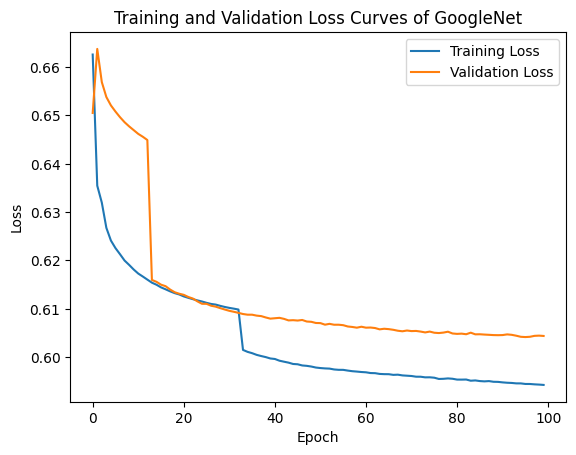

Test Hamming Loss: 0.3163
Test F1-score: 0.8102
Test Precision: 0.6848
Test Recall: 0.9919
Test Accuracy: 0.4472


In [107]:

# Define the GoogleNet model for multi-label classification
class GoogleNetMultiLabel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GoogleNetMultiLabel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # For multi-label classification
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output dimensions (two target variables)

# Instantiate the model for multi-label classification
model = GoogleNetMultiLabel(input_dim, output_dim)

# Use Binary Cross Entropy Loss for multi-label classification
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training Loop
num_epochs = 100  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch
validation_loss = []  # List to store validation loss for each epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_train_loss = 0
    
    for data, labels in train_loader:
        # Forward Pass
        outputs = model(data)
        
        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    # Calculate average training loss for the epoch
    training_loss.append(epoch_train_loss / len(train_loader))
    
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    epoch_val_loss = 0
    val_predictions = []
    val_targets = []

    with torch.no_grad():
        for data, labels in val_loader:
            outputs = model(data)
            loss = criterion(outputs, labels.float())
            epoch_val_loss += loss.item()

            # Collect predictions and targets for evaluation
            val_predictions.extend(outputs.numpy())
            val_targets.extend(labels.numpy())

    # Calculate average validation loss for the epoch
    validation_loss.append(epoch_val_loss / len(val_loader))

    # Evaluation on Validation Set
    val_predictions = torch.tensor(val_predictions) > 0.5  # Apply threshold for multi-label classification
    val_targets = torch.tensor(val_targets)

    val_ham_loss = hamming_loss(val_targets, val_predictions)
    val_f1 = f1_score(val_targets, val_predictions, average='micro')
    val_precision = precision_score(val_targets, val_predictions, average='micro')
    val_recall = recall_score(val_targets, val_predictions, average='micro')
    val_accuracy = accuracy_score(val_targets, val_predictions)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss[-1]:.4f}, Validation Loss: {validation_loss[-1]:.4f}')
    print(f'Validation Hamming Loss: {val_ham_loss:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot Loss Curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves of GoogleNet")
plt.legend()
plt.savefig('/Users/niraj/Desktop/ML-Cognitive-Science/Figures/loss_curve.png')

plt.show()

# Evaluation on Test Set
test_predictions = []
test_targets = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(labels.numpy())

test_predictions = torch.tensor(test_predictions) > 0.5  # Apply threshold for multi-label classification
test_targets = torch.tensor(test_targets)

test_ham_loss = hamming_loss(test_targets, test_predictions)
test_f1 = f1_score(test_targets, test_predictions, average='micro')
test_precision = precision_score(test_targets, test_predictions, average='micro')
test_recall = recall_score(test_targets, test_predictions, average='micro')
test_accuracy = accuracy_score(test_targets, test_predictions)

print(f'Test Hamming Loss: {test_ham_loss:.4f}')
print(f'Test F1-score: {test_f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [1/100], Training Loss: 0.6835, Validation Loss: 0.6763
Validation Hamming Loss: 0.3202
Validation F1-score: 0.8058
Validation Precision: 0.6975
Validation Recall: 0.9540
Validation Accuracy: 0.4456
Epoch [2/100], Training Loss: 0.6598, Validation Loss: 0.6867
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [3/100], Training Loss: 0.6436, Validation Loss: 0.6740
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [4/100], Training Loss: 0.6327, Validation Loss: 0.6655
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [5/100], Training Loss: 0.6253, Validation Loss: 0.6600
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Val

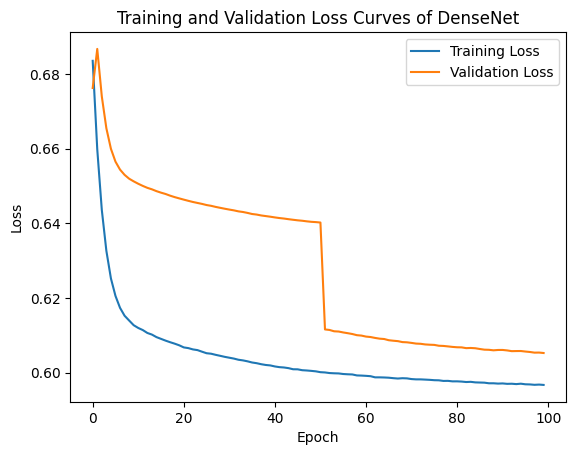

Test Hamming Loss: 0.3177
Test F1-score: 0.8103
Test Precision: 0.6827
Test Recall: 0.9966
Test Accuracy: 0.4408


In [108]:
# Define the DenseNet model for multi-label classification
class DenseNetMultiLabel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DenseNetMultiLabel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # For multi-label classification
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output dimensions (two target variables)

# Instantiate the model for multi-label classification
model = DenseNetMultiLabel(input_dim, output_dim)

# Use Binary Cross Entropy Loss for multi-label classification
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training Loop
num_epochs = 100  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch
validation_loss = []  # List to store validation loss for each epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_train_loss = 0
    
    for data, labels in train_loader:
        # Forward Pass
        outputs = model(data)
        
        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    # Calculate average training loss for the epoch
    training_loss.append(epoch_train_loss / len(train_loader))
    
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    epoch_val_loss = 0
    val_predictions = []
    val_targets = []

    with torch.no_grad():
        for data, labels in val_loader:
            outputs = model(data)
            loss = criterion(outputs, labels.float())
            epoch_val_loss += loss.item()

            # Collect predictions and targets for evaluation
            val_predictions.extend(outputs.numpy())
            val_targets.extend(labels.numpy())

    # Calculate average validation loss for the epoch
    validation_loss.append(epoch_val_loss / len(val_loader))

    # Evaluation on Validation Set
    val_predictions = torch.tensor(val_predictions) > 0.5  # Apply threshold for multi-label classification
    val_targets = torch.tensor(val_targets)

    val_ham_loss = hamming_loss(val_targets, val_predictions)
    val_f1 = f1_score(val_targets, val_predictions, average='micro')
    val_precision = precision_score(val_targets, val_predictions, average='micro')
    val_recall = recall_score(val_targets, val_predictions, average='micro')
    val_accuracy = accuracy_score(val_targets, val_predictions)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss[-1]:.4f}, Validation Loss: {validation_loss[-1]:.4f}')
    print(f'Validation Hamming Loss: {val_ham_loss:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot Loss Curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves of DenseNet")
plt.legend()
plt.savefig('/Users/niraj/Desktop/ML-Cognitive-Science/Figures/densenet_loss_curve.png')

plt.show()

# Evaluation on Test Set
test_predictions = []
test_targets = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(labels.numpy())

test_predictions = torch.tensor(test_predictions) > 0.5  # Apply threshold for multi-label classification
test_targets = torch.tensor(test_targets)

test_ham_loss = hamming_loss(test_targets, test_predictions)
test_f1 = f1_score(test_targets, test_predictions, average='micro')
test_precision = precision_score(test_targets, test_predictions, average='micro')
test_recall = recall_score(test_targets, test_predictions, average='micro')
test_accuracy = accuracy_score(test_targets, test_predictions)

print(f'Test Hamming Loss: {test_ham_loss:.4f}')
print(f'Test F1-score: {test_f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [1/100], Training Loss: 0.6903, Validation Loss: 0.6749
Validation Hamming Loss: 0.3926
Validation F1-score: 0.7291
Validation Precision: 0.7021
Validation Recall: 0.7583
Validation Accuracy: 0.3650
Epoch [2/100], Training Loss: 0.6643, Validation Loss: 0.6570
Validation Hamming Loss: 0.3261
Validation F1-score: 0.8010
Validation Precision: 0.6966
Validation Recall: 0.9422
Validation Accuracy: 0.4353
Epoch [3/100], Training Loss: 0.6469, Validation Loss: 0.6455
Validation Hamming Loss: 0.3054
Validation F1-score: 0.8190
Validation Precision: 0.6974
Validation Recall: 0.9921
Validation Accuracy: 0.4573
Epoch [4/100], Training Loss: 0.6433, Validation Loss: 0.6652
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8211
Validation Precision: 0.6968
Validation Recall: 0.9995
Validation Accuracy: 0.4587
Epoch [5/100], Training Loss: 0.6354, Validation Loss: 0.6595
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Val

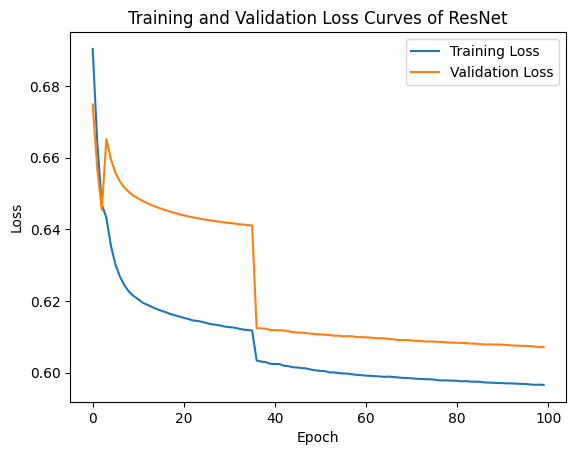

Test Hamming Loss: 0.3168
Test F1-score: 0.8110
Test Precision: 0.6830
Test Recall: 0.9980
Test Accuracy: 0.4426


In [109]:

# Define the ResNet model for multi-label classification
class ResNetMultiLabel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ResNetMultiLabel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # For multi-label classification
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output dimensions (two target variables)

# Instantiate the model for multi-label classification
model = ResNetMultiLabel(input_dim, output_dim)

# Use Binary Cross Entropy Loss for multi-label classification
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training Loop
num_epochs = 100  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch
validation_loss = []  # List to store validation loss for each epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_train_loss = 0
    
    for data, labels in train_loader:
        # Forward Pass
        outputs = model(data)
        
        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    # Calculate average training loss for the epoch
    training_loss.append(epoch_train_loss / len(train_loader))
    
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    epoch_val_loss = 0
    val_predictions = []
    val_targets = []

    with torch.no_grad():
        for data, labels in val_loader:
            outputs = model(data)
            loss = criterion(outputs, labels.float())
            epoch_val_loss += loss.item()

            # Collect predictions and targets for evaluation
            val_predictions.extend(outputs.numpy())
            val_targets.extend(labels.numpy())

    # Calculate average validation loss for the epoch
    validation_loss.append(epoch_val_loss / len(val_loader))

    # Evaluation on Validation Set
    val_predictions = torch.tensor(val_predictions) > 0.5  # Apply threshold for multi-label classification
    val_targets = torch.tensor(val_targets)

    val_ham_loss = hamming_loss(val_targets, val_predictions)
    val_f1 = f1_score(val_targets, val_predictions, average='micro')
    val_precision = precision_score(val_targets, val_predictions, average='micro')
    val_recall = recall_score(val_targets, val_predictions, average='micro')
    val_accuracy = accuracy_score(val_targets, val_predictions)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss[-1]:.4f}, Validation Loss: {validation_loss[-1]:.4f}')
    print(f'Validation Hamming Loss: {val_ham_loss:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot Loss Curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves of ResNet")
plt.legend()
plt.savefig('/Users/niraj/Desktop/ML-Cognitive-Science/Figures/resnet_loss_curve.png')

plt.show()

# Evaluation on Test Set
test_predictions = []
test_targets = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(labels.numpy())

test_predictions = torch.tensor(test_predictions) > 0.5  # Apply threshold for multi-label classification
test_targets = torch.tensor(test_targets)

test_ham_loss = hamming_loss(test_targets, test_predictions)
test_f1 = f1_score(test_targets, test_predictions, average='micro')
test_precision = precision_score(test_targets, test_predictions, average='micro')
test_recall = recall_score(test_targets, test_predictions, average='micro')
test_accuracy = accuracy_score(test_targets, test_predictions)

print(f'Test Hamming Loss: {test_ham_loss:.4f}')
print(f'Test F1-score: {test_f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [1/100], Training Loss: 0.6831, Validation Loss: 0.6686
Validation Hamming Loss: 0.3364
Validation F1-score: 0.7912
Validation Precision: 0.6969
Validation Recall: 0.9150
Validation Accuracy: 0.4194
Epoch [2/100], Training Loss: 0.6563, Validation Loss: 0.6487
Validation Hamming Loss: 0.3079
Validation F1-score: 0.8153
Validation Precision: 0.7004
Validation Recall: 0.9753
Validation Accuracy: 0.4566
Epoch [3/100], Training Loss: 0.6394, Validation Loss: 0.6368
Validation Hamming Loss: 0.3041
Validation F1-score: 0.8203
Validation Precision: 0.6971
Validation Recall: 0.9965
Validation Accuracy: 0.4573
Epoch [4/100], Training Loss: 0.6292, Validation Loss: 0.6304
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Validation Accuracy: 0.4587
Epoch [5/100], Training Loss: 0.6231, Validation Loss: 0.6269
Validation Hamming Loss: 0.3034
Validation F1-score: 0.8212
Validation Precision: 0.6966
Validation Recall: 1.0000
Val

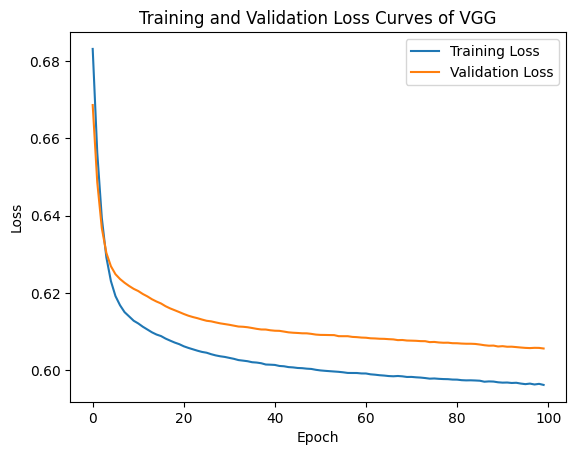

Test Hamming Loss: 0.3159
Test F1-score: 0.8112
Test Precision: 0.6839
Test Recall: 0.9966
Test Accuracy: 0.4444


In [110]:


# Define the VGG model for multi-label classification
class VGGMultiLabel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(VGGMultiLabel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # For multi-label classification
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output dimensions (two target variables)

# Instantiate the model for multi-label classification
model = VGGMultiLabel(input_dim, output_dim)

# Use Binary Cross Entropy Loss for multi-label classification
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training Loop
num_epochs = 100  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch
validation_loss = []  # List to store validation loss for each epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_train_loss = 0
    
    for data, labels in train_loader:
        # Forward Pass
        outputs = model(data)
        
        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    # Calculate average training loss for the epoch
    training_loss.append(epoch_train_loss / len(train_loader))
    
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    epoch_val_loss = 0
    val_predictions = []
    val_targets = []

    with torch.no_grad():
        for data, labels in val_loader:
            outputs = model(data)
            loss = criterion(outputs, labels.float())
            epoch_val_loss += loss.item()

            # Collect predictions and targets for evaluation
            val_predictions.extend(outputs.numpy())
            val_targets.extend(labels.numpy())

    # Calculate average validation loss for the epoch
    validation_loss.append(epoch_val_loss / len(val_loader))

    # Evaluation on Validation Set
    val_predictions = torch.tensor(val_predictions) > 0.5  # Apply threshold for multi-label classification
    val_targets = torch.tensor(val_targets)

    val_ham_loss = hamming_loss(val_targets, val_predictions)
    val_f1 = f1_score(val_targets, val_predictions, average='micro')
    val_precision = precision_score(val_targets, val_predictions, average='micro')
    val_recall = recall_score(val_targets, val_predictions, average='micro')
    val_accuracy = accuracy_score(val_targets, val_predictions)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss[-1]:.4f}, Validation Loss: {validation_loss[-1]:.4f}')
    print(f'Validation Hamming Loss: {val_ham_loss:.4f}')
    print(f'Validation F1-score: {val_f1:.4f}')
    print(f'Validation Precision: {val_precision:.4f}')
    print(f'Validation Recall: {val_recall:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

# Plot Loss Curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves of VGG")
plt.legend()
plt.savefig('/Users/niraj/Desktop/ML-Cognitive-Science/Figures/vgg_loss_curve.png')

plt.show()

# Evaluation on Test Set
test_predictions = []
test_targets = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        test_predictions.extend(outputs.numpy())
        test_targets.extend(labels.numpy())

test_predictions = torch.tensor(test_predictions) > 0.5  # Apply threshold for multi-label classification
test_targets = torch.tensor(test_targets)

test_ham_loss = hamming_loss(test_targets, test_predictions)
test_f1 = f1_score(test_targets, test_predictions, average='micro')
test_precision = precision_score(test_targets, test_predictions, average='micro')
test_recall = recall_score(test_targets, test_predictions, average='micro')
test_accuracy = accuracy_score(test_targets, test_predictions)

print(f'Test Hamming Loss: {test_ham_loss:.4f}')
print(f'Test F1-score: {test_f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
